# Toxic comments

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Toxic comments. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix, hstack


### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [3]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    toxic_data = pd.read_csv(fn)
    if (not test):
        # add an indicator for any toxic, severe toxic, obscene, threat, insult, or indentity hate
        toxic_data['any_toxic'] = (toxic_data['toxic'] + toxic_data['severe_toxic'] + toxic_data['obscene'] + toxic_data['threat'] + toxic_data['insult'] + toxic_data['identity_hate'] > 0)
    print("toxic_data is:", type(toxic_data))
    print("toxic_data has", toxic_data.shape[0], "rows and", toxic_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in toxic_data:")
    print(toxic_data.dtypes, "\n")
    print("the first 10 rows in toxic_data:")
    print(toxic_data.head(5))
    if (not test):
        print("The rate of 'toxic' Wikipedia comments in the dataset: ")
        print(toxic_data['any_toxic'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(binary = True, n_features=2 ** 17, alternate_sign=False, ngram_range=(1, 2))
        X_hv = hv.fit_transform(toxic_data.comment_text)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
        
        from sklearn.feature_extraction.text import CountVectorizer
        
        
        
    else: # transform() 
        X_hv = fitted_transformations[0].transform(toxic_data.comment_text)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    toxic_data['word_count'] = toxic_data['comment_text'].str.split(' ').str.len()
    toxic_data['punc_count'] = toxic_data['comment_text'].str.count("\.")

    X_quant_features = toxic_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = toxic_data['any_toxic']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(toxic_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, toxic_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [4]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='Data/toxiccomments_train.csv', my_random_seed=12)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

toxic_data is: <class 'pandas.core.frame.DataFrame'>
toxic_data has 159571 rows and 9 columns 

the data types for each of the columns in toxic_data:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
any_toxic          bool
dtype: object 

the first 10 rows in toxic_data:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  any_toxic  
0             0        0     

# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [5]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_error")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 12900, 'Neg': 114756, 'TP': 6437, 'TN': 58030, 'FP': 56726, 'FN': 6463, 'Accuracy': 0.5050056401579244, 'Precision': 0.10191092886658329, 'Recall': 0.49899224806201553, 'desc': 'ols_train'}


/Users/ian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### MODEL: SVM, linear

In [6]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 12900, 'Neg': 114756, 'TP': 12876, 'TN': 114740, 'FP': 16, 'FN': 24, 'Accuracy': 0.9996866578930876, 'Precision': 0.9987589202606267, 'Recall': 0.998139534883721, 'desc': 'svm_train'}


### MODEL: logistic regression

In [7]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log_loss')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 12900, 'Neg': 114756, 'TP': 12880, 'TN': 114742, 'FP': 14, 'FN': 20, 'Accuracy': 0.9997336592091245, 'Precision': 0.998914223669924, 'Recall': 0.9984496124031008, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 12900, 'Neg': 114756, 'TP': 12602, 'TN': 109165, 'FP': 5591, 'FN': 298, 'Accuracy': 0.9538682083098327, 'Precision': 0.6926839993404057, 'Recall': 0.9768992248062015, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [9]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 12900, 'Neg': 114756, 'TP': 12878, 'TN': 114739, 'FP': 17, 'FN': 22, 'Accuracy': 0.9996944914457605, 'Precision': 0.9986816595579682, 'Recall': 0.9982945736434109, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [75]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=0.1)
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 12900, 'Neg': 114756, 'TP': 12890, 'TN': 114742, 'FP': 14, 'FN': 10, 'Accuracy': 0.9998119947358526, 'Precision': 0.9989150650960942, 'Recall': 0.9992248062015504, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 12900, 'Neg': 114756, 'TP': 0, 'TN': 114756, 'FP': 0, 'FN': 12900, 'Accuracy': 0.8989471705207746, 'Precision': nan, 'Recall': 0.0, 'desc': 'rdf_train'}


/Users/ian/Desktop/ml/final_assignment_1/my_measures.py:25: RuntimeWarning: invalid value encountered in scalar divide
  self.performance_measures['Precision'] = self.performance_measures['TP'] / (self.performance_measures['TP'] + self.performance_measures['FP'])


### ROC plot to compare performance of various models and fits

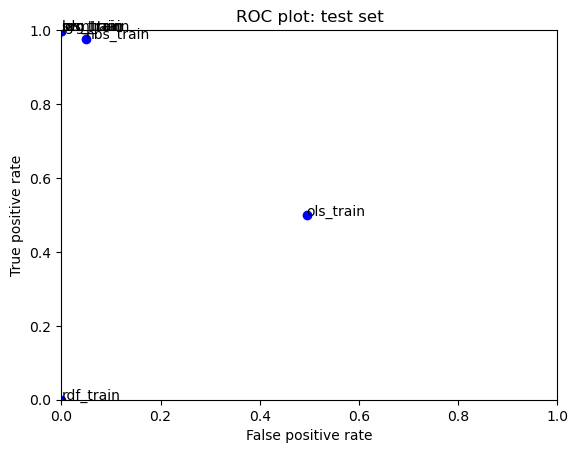

In [61]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

### let's look at some false positives:

In [45]:
ols_predictions = ols.predict(X_train)

In [46]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['any_toxic'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['comment_text'])
                print('* * * * * * * * * ')


Examples of false positives:
0
Stop removing tags - it is considered vandalism 

Please stop removing speedy deletion notices from articles that you have created yourself. If you continue to remove them, you will be blocked from editing Wikipedia.
* * * * * * * * * 
109
what can i edit then because i didnt add anything bad and it was context.
* * * * * * * * * 
147
Lecher lines (moved fronm my talk page) 

 Lecher lines 

Do you have any thoughts on the subject of tuned circuits for UHF/SHF, I am planning on expanding the page a little to make it more useful.

Yes, But I have to gather my thoughts. The trouble is that you have reverted some of my corrections to this page in your addition. Can you pleae be more careful when adding material that you dont destroy peoples improvements? BTW can you please sign your posts by typing four tildes so we know who to reply to. Thanks. 

I think that a clear need exists for the division between balanced and unbalanced transmission lines. Many aeria

27260
July 2007 (UTC)

I have no COI. Yes, I am a director of the Market Technicians Association, but I make not a cent from TA, and consider myself to be an economist.  20:58, 25
* * * * * * * * * 
27290
"
Dear Celtus,
having just seen the ruling concerning the case, I would like to express once more my appreciation of a most gentlemanly exchange. I fully accept and agree that whatever the circumstances, my action did constitute a breach of policy, and I have no intention of reoffending. However, given the fact that I now have a sockpuppetry case in my past - as well as apparently indelible, although quite incorrect, accusations of ""nonsense"" etc. attached to my writings - I would very much like to perform a clean start under a new name. Since my writing style is somewhat characteristic ;-) , and since at least some of my writings would concern articles/subjects I have touched upon before, I would hope to be able to make such a clean start without being suspected of sockpuppetry onc

48073
Do not engage in edit warring by reverting pages more than 3 times. You may be blocked from editing. 85.237.211.189
* * * * * * * * * 
48175
"

Extracts from Robert A Gilbert's article on Freemasonry (Freemason, author and historian), sourced from Encyclopaedia of New Religions, edited by Christopher Partridge, Lion Hudson plc, 2004 ISBN 978-0-7459-5219-2

""Because there is no universally accepted theory of its origins, and because its nature and purpose have been given such widely divergent interpretations, a concise, adequate definition of Freemasonry remains elusive. What is, perhaps, the most effective attempt at a definition is that given by the United Grand Lodge of England (UGLE), the controlling body of English Freemasonry:

""[Freemasonry is] one of the world's oldest secular fraternal societies... society of men concerned with spiritual values. Its members are taught its precepts by a series of ritual dramas, which folow ancient forms and use stonemasons' customs and t

68321
":::Comment: As the one who requested the move, I would like to point that I do not belong to the Wilco fan base. They bore me silly. I suggested the move back because it appears to be the arrangement that is of the greatest utility to an overwhelming majority of users. It seems that about 97% of users who land on the page that was called just Wilco do in fact want information about the band. The other uses, including the radio voice procedure, are handled on the disambiguation page because they are sought for by relatively few. Your arrangement—sending every searcher to the dab page—is a good solution when there is no clear primary topic. But in this case, it is an arrangement that unnecessarily inconveniences the 97 for the marginal benefit of the 3. One thing we could certainly do, though, if the band article is returned to the plain title, is to recognize the origin of the term by adding Voice procedure to the hatnote. Talk 
"
* * * * * * * * * 
68372
The problem with History

88913
"

 NPOV 

You'd need strong consensus to change a longstanding lead on a core content policy. The changes you made removed some fairly important points.  talk|contribs "
* * * * * * * * * 
89042
Please continue this discussion on Sargis Bkheera's talk page. Thanks. |Talk 20:45, 14 Jun, 2007 (UTC)
* * * * * * * * * 
89157
"
No, but he is able to undelete if he sees fit to do so.  talk "
* * * * * * * * * 
89165
"
Let's remember, ""It ain't over till the fat lady sings."" There's still one more investigation underway, and when that report is in, this will all have to be done over.  The final resultgeneral support of the scientistsis perhaps a given, since they're 2 for 0 at present.  Just saying, today's version will be reworked anyway, so let's not get too worked up about it.    "
* * * * * * * * * 
89202
"

Read more
You can read more by going to anomtalk.com except with ""n"" instead of ""m""."
* * * * * * * * * 
89255
I think its pretty good, and should pass the FAC.
* * * * *

109435
This has to be one of the longest-last most-horrible Wikipedia pages I've seen.  The endless orgy of information about cutbacks, and of equipment, much of which it isn't clear if still runs (some sent to the junk yard a quarter-century ago) — no one has made any comment here about these issues, or the POV concerns.  As far as I can tell, someone needs to take a knife to entire article.  Is there anyone who actually objects - or cares?
* * * * * * * * * 
109492
Ahh, If i quote, it actually going to sound worse.  But hey, that is what you asked.
* * * * * * * * * 
109512
Text 

Isn't it time to add the lyrics/text/liberetto's to Wiki?
* * * * * * * * * 
109526
Please unprotect. 68.220.187.213
* * * * * * * * * 
109587
Where is this section, WLU? Your changes must be verifiable. Also, like my last comment, I have no idea where you guys are with this sentence. I see you added page 262 to the citation, WhatamIdoing. Can you say what part of that page supports this sentence, how you w

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [47]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 3325, 'Neg': 28590, 'TP': 1663, 'TN': 14388, 'FP': 14202, 'FN': 1662, 'Accuracy': 0.5029296569011437, 'Precision': 0.10482193507721399, 'Recall': 0.5001503759398497, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [48]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 3325, 'Neg': 28590, 'TP': 1981, 'TN': 27604, 'FP': 986, 'FN': 1344, 'Accuracy': 0.9269935766880777, 'Precision': 0.6676777890124705, 'Recall': 0.5957894736842105, 'desc': 'svm_test'}


### MODEL: logistic regression

In [49]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 3325, 'Neg': 28590, 'TP': 1950, 'TN': 27567, 'FP': 1023, 'FN': 1375, 'Accuracy': 0.9248629171236096, 'Precision': 0.6559031281533805, 'Recall': 0.5864661654135338, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [50]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 3325, 'Neg': 28590, 'TP': 1492, 'TN': 26838, 'FP': 1752, 'FN': 1833, 'Accuracy': 0.8876703744320852, 'Precision': 0.4599260172626387, 'Recall': 0.4487218045112782, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [51]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 3325, 'Neg': 28590, 'TP': 2013, 'TN': 27510, 'FP': 1080, 'FN': 1312, 'Accuracy': 0.925050916496945, 'Precision': 0.6508244422890398, 'Recall': 0.6054135338345865, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [77]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 3325, 'Neg': 28590, 'TP': 1852, 'TN': 17600, 'FP': 10990, 'FN': 1473, 'Accuracy': 0.6094939683534388, 'Precision': 0.14421429683849868, 'Recall': 0.5569924812030075, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [68]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 3325, 'Neg': 28590, 'TP': 0, 'TN': 28590, 'FP': 0, 'FN': 3325, 'Accuracy': 0.8958170139432868, 'Precision': nan, 'Recall': 0.0, 'desc': 'rdf_test'}


/Users/ian/Desktop/ml/final_assignment_1/my_measures.py:25: RuntimeWarning: invalid value encountered in scalar divide
  self.performance_measures['Precision'] = self.performance_measures['TP'] / (self.performance_measures['TP'] + self.performance_measures['FP'])


### ROC plot to compare performance of various models and fits

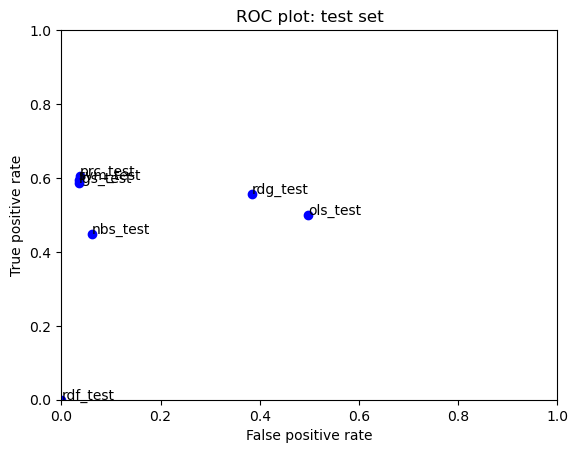

In [78]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [23]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='Data/toxiccomments_test.csv', my_random_seed=12, test=True)
print("Number of rows in the submission test set (should be 153,164): ")

toxic_data is: <class 'pandas.core.frame.DataFrame'>
toxic_data has 153164 rows and 2 columns 

the data types for each of the columns in toxic_data:
id              object
comment_text    object
dtype: object 

the first 10 rows in toxic_data:
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.
Shape of HashingVectorizer X:
(153164, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0          72          10
1          13           1
2          16           0
3          38           3
4           7           1
5          16           2
6          31           4
7           6       

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [24]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = ols.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.4993144603170458


In [25]:
raw_data.head()

,id,comment_text,word_count,punc_count
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,72,10
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,13,1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",16,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",38,3
4,00017695ad8997eb,I don't anonymously edit articles at all.,7,1


In [26]:
my_submission.head()

,id,prediction
0,00001cee341fdb12,True
1,0000247867823ef7,False
2,00013b17ad220c46,True
3,00017563c3f7919a,False
4,00017695ad8997eb,True


In [27]:
my_submission.shape

(153164, 2)

In [28]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('Data/toxiccomments_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation